In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def solvr(w,t,p):
    
    x,y,u,v = w
    
    alpha,phi,l_1,l_2,i,eta = p
    
    f = [u,
         v,
         2*np.pi*alpha*phi - (i/2.0)*(l_2 - l_1) - eta*u - 2.0*alpha*x - np.sin(x)*np.cos(y),
        -eta*v + i/2.0 - np.sin(y)*np.cos(x)]
    
    return f
    


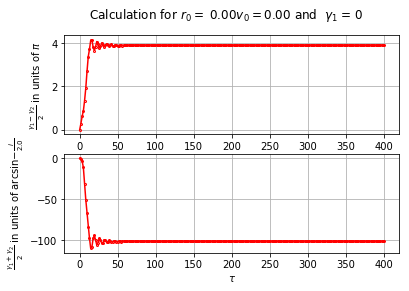

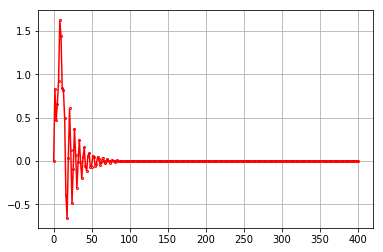

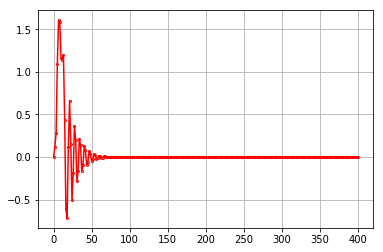

In [2]:
%reset -f
# Solve the system in function of the initial conditions

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def solvr(w,t,p):
    
    x,y,u,v = w
    
    alpha,phi,l_1,l_2,i,eta = p
    
    f = [u,
         v,
         2*np.pi*alpha*phi - (i/2.0)*(l_2 - l_1) - eta*u - 2.0*alpha*x - np.sin(x)*np.cos(y),
        -eta*v + i/2.0 - np.sin(y)*np.cos(x)]
    
    return f



eta = 0.15
alpha = 0.05
phi = 3
l_1 = 0.5
l_2 = 0.5
i = 0.25

# Initial conditions

coefr = 0
coefg = 0

#r_0 = (np.pi/2.0 - np.arccos(i/2.0))*coefr
r_0 = np.pi*coefr

#v_0 = np.pi*coefg
v_0 = np.arcsin(i/2.0)*coefg

gamma_1 = r_0 + v_0


p = [alpha, phi, l_1, l_2, i, eta]
w_O = np.array([r_0,v_0,0,0])

abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 400
begintime = 0
numpoints = 250

#t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
t = np.linspace(begintime,stoptime,numpoints)

sol = integrate.odeint(solvr,w_O,t,args=(p,),atol=abserr,rtol=relerr)



x_sol_pi = sol[:,0]/np.pi
y_sol_arc = sol[:,1]/np.arcsin(-i/2.0)
#y_sol_arc = sol[:,1]/(np.pi/2.0 - np.arccos(i/2.0))

#x_sol_pi = sol[:,0]/np.arccos(i/2.0)
#y_sol_arc = sol[:,1]/(np.pi/2.0)


fig = plt.figure(1)
plt.subplot(211)
plt.plot(t,x_sol_pi,'r-o',mfc='none',markersize = 2)
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{\gamma_1 - \gamma_2}{2} {}$ in units of $\pi$')

plt.suptitle(r'Calculation for $r_0 =$ %.2f' %r_0 + r'$v_0 = $%.2f ${}$' %v_0 + 'and ${}$ $\gamma_1$ = %.f' %gamma_1)


plt.subplot(212)
plt.plot(t,y_sol_arc,'r-o',mfc='none',markersize = 2)
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{\gamma_1 + \gamma_2}{2} {} $ in units of $\arcsin{-\frac{i}{2.0}}$')
plt.show()

fig.savefig('Initialcnditions__.pdf',bbox_inches='tight')

plt.figure(3)
plt.plot(t,sol[:,2],'r-o',mfc='none',markersize = 2)
plt.grid()
plt.show()

plt.figure(4)
plt.plot(t,sol[:,3],'r-o',mfc='none',markersize = 2)
plt.grid()
plt.show()


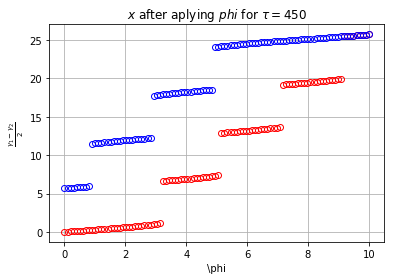

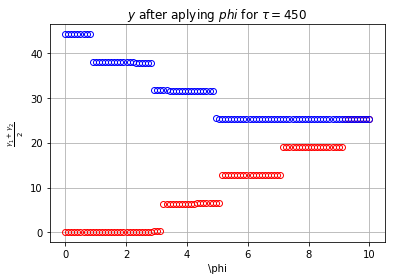

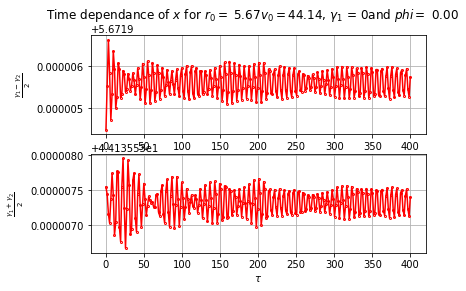

In [17]:
%reset -f

# Solve the system when a magnetic field is applied 

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def solvr(w,t,p):
    
    x,y,u,v = w
    
    alpha,phi,l_1,l_2,i,eta = p
    
    f = [u,
         v,
         2*np.pi*alpha*phi - (i/2.0)*(l_2 - l_1) - eta*u - 2.0*alpha*x - np.sin(x)*np.cos(y),
        -eta*v + i/2.0 - np.sin(y)*np.cos(x)]
    
    return f


lenmaxPhi = 100
valmaxPhi = 10

eta = 0.05
#eta = 0.15 # Here there is no phase difference no matter how you remove the field
alpha = 0.05
# Define for which phi the solutions will be calculated
phi = np.linspace(0,valmaxPhi,lenmaxPhi)
l_1 = 0.5
l_2 = 0.5
i = 0.25


abserr = 1.0e-8
relerr = 1.0e-6

stoptime = 400 # For how long we will submit the system to a non zero magnetic field
begintime = 0
numpoints = 250

# Initial conditions before aplying the magnetic field
coefr = 0
coefg = 0

r_0 = np.pi*coefr

v_0 = np.arcsin(i/2.0)*coefg

gamma_1 = r_0 + v_0

figmainr = plt.figure(1)
figmainv = plt.figure(2)

posFig = 3

# Find the solutions for each field defined previously and plot the value obtaine at the stoptime
# Uncomment the code in the middle to also see how the system will reach stability for each intermediary 
# magnetic field/ step

for champos in range(len(phi)):
    
    p = [alpha, phi[champos], l_1, l_2, i ,eta]
    w_O = np.array([r_0,v_0,0,0])
    
    t = np.linspace(begintime,stoptime,numpoints)

    sol = integrate.odeint(solvr,w_O,t,args=(p,),atol=abserr,rtol=relerr)
    
    # Uncomment this only if you want to plot what happens at every intermediary increase or decrease in phi
    
    #x_sol_pi = sol[:,0]/np.pi
    #y_sol_arc = sol[:,1]/np.arcsin(-i/2.0)

    #fig = plt.figure(posFig)
    
    #plt.subplot(211)
    #plt.plot(t,x_sol_pi,'r-o',mfc='none',markersize = 2)
    #plt.grid()
    #plt.xlabel(r'$\tau$')
    #plt.ylabel(r'$\frac{\gamma_1 - \gamma_2}{2} {}$ in units of $\pi$')

    #plt.suptitle(r'Calculation for $r_0 =$ %.2f' %r_0 + r'$v_0 = $%.2f ${}$' %v_0 + ', ${}$ $\gamma_1$ = %.f' %gamma_1
    #          + 'and \phi = %.2f' % phi[champos])


    #plt.subplot(212)
    #plt.plot(t,y_sol_arc,'r-o',mfc='none',markersize = 2)
    #plt.grid()
    #plt.xlabel(r'$\tau$')
    #plt.ylabel(r'$\frac{\gamma_1 + \gamma_2}{2} {} $ in units of $\arcsin{-\frac{i}{2.0}}$')
    
    #fig.savefig('FixedPointsPhi%.2f'%phi[champos] + '_%.2f'%posFig + '.pdf',bbox_inches='tight')
    
    #posFig = posFig + 1 
    
    # The new conditions
    
    r_0,v_0 = sol[numpoints-1,[0,1]]
    
    plt.figure(1)
    plt.plot(phi[champos],r_0,'ro',mfc='none',markersize='6')
    
    plt.figure(2)
    plt.plot(phi[champos],v_0,'ro',mfc='none',markersize='6')
    
    

    
    
valmaxPhi = 0
phi = np.linspace(10,valmaxPhi,lenmaxPhi)

# Comment this to find the plot for when the magnetic field is
# Abruptedly removed
# Go back and remove the field little by little and give time for the system to stablize before
# each step
    
for champos in range(len(phi)):
    
    p = [alpha, phi[champos], l_1, l_2, i ,eta]
    w_O = np.array([r_0,v_0,0,0])
    
    t = np.linspace(begintime,stoptime,numpoints)

    sol = integrate.odeint(solvr,w_O,t,args=(p,),atol=abserr,rtol=relerr)
    
    # Uncomment this only if you want to plot what happens at every intermediary increase or decrease in phi
    
    #x_sol_pi = sol[:,0]/np.pi
    #y_sol_arc = sol[:,1]/np.arcsin(-i/2.0)

    #fig = plt.figure(posFig)
    
    #plt.subplot(211)
    #plt.plot(t,x_sol_pi,'r-o',mfc='none',markersize = 2)
    #plt.grid()
    #plt.xlabel(r'$\tau$')
    #plt.ylabel(r'$\frac{\gamma_1 - \gamma_2}{2} {}$ in units of $\pi$')

    #plt.suptitle(r'Calculation for $r_0 =$ %.2f' %r_0 + r'$v_0 = $%.2f ${}$' %v_0 + ', ${}$ $\gamma_1$ = %.f' %gamma_1
    #          + 'and \phi = %.2f' % phi[champos])


    #plt.subplot(212)
    #plt.plot(t,y_sol_arc,'r-o',mfc='none',markersize = 2)
    #plt.grid()
    #plt.xlabel(r'$\tau$')
    #plt.ylabel(r'$\frac{\gamma_1 + \gamma_2}{2} {} $ in units of $\arcsin{-\frac{i}{2.0}}$')
    
    #fig.savefig('FixedPointsPhi%.2f'%phi[champos] + '_%.2f'%posFig + '.pdf',bbox_inches='tight')
    
    #posFig = posFig + 1 
    
    # The new conditions
    
    # Uncomment this in order to plot the value found at the maximum time
    
    r_0,v_0 = sol[numpoints-1,[0,1]]
    
    plt.figure(1)
    plt.plot(phi[champos],r_0,'bo',mfc='none',markersize='6')
    
    plt.figure(2)
    plt.plot(phi[champos],v_0,'bo',mfc='none',markersize='6')

    
# Go to zero    
    
phi = 0 

posFig = 10

p = [alpha,phi, l_1, l_2, i, eta]
w_O = np.array([r_0,v_0,0,0])
    
t = np.linspace(begintime,stoptime,numpoints)

sol = integrate.odeint(solvr,w_O,t,args=(p,),atol=abserr,rtol=relerr)
    
x_sol_pi = sol[:,0]

y_sol_arc = sol[:,1]    

fig = plt.figure(posFig)
    
plt.subplot(211)
plt.plot(t,x_sol_pi,'r-o',mfc='none',markersize = 2)
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{\gamma_1 - \gamma_2}{2}$')

plt.suptitle(r'Time dependance of $x$ for $r_0 =$ %.2f' %r_0 + r'$v_0 = $%.2f' %v_0 + r', $\gamma_1$ = %.f' %gamma_1
           + r'and $phi =$ %.2f' %phi)


plt.subplot(212)
plt.plot(t,y_sol_arc,'r-o',mfc='none',markersize = 2)
plt.grid()
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{\gamma_1 + \gamma_2}{2} $')
 
fig.savefig('FixedPointsPhi%.2f'%phi + '.pdf',bbox_inches='tight')



fig = plt.figure(1)

plt.grid()
plt.xlabel(r'\phi')
plt.ylabel(r'$\frac{\gamma_1 - \gamma_2}{2} $')
plt.title(r'$x$ after aplying $phi$ for $\tau  = 450$')

fig.savefig('BACKStableinfuncitonofIPoints.pdf',bbox_inches='tight')


fig = plt.figure(2)

plt.grid()
plt.xlabel(r'\phi')
plt.ylabel(r'$\frac{\gamma_1 + \gamma_2}{2} $')
plt.title(r'$y$ after aplying $phi$ for $\tau  = 450$')

fig.savefig('BACKtableinfuncitonofI2Points.pdf',bbox_inches='tight')


plt.show()
    